In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import pearsonr,spearmanr

In [36]:
df = pd.read_excel("Healthcare_dataset.xlsx", sheet_name = "Case Study Dataset")

In [37]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
1,NaN,2020-01-01 00:00:00,0.96,2.21,68.34,0.221,0.6834,65
2,NaN,2020-02-01 00:00:00,0.96,1.79,72.75,0.179,0.7275,65
3,NaN,2020-03-01 00:00:00,0.81,1.03,67.07,0.103,0.6707,65
4,NaN,2020-04-01 00:00:00,0.94,1.97,71.21,0.197,0.7121,65
...,...,...,...,...,...,...,...,...
56,NaN,2024-08-01 00:00:00,0.96,2.63,65.46,0.263,0.6546,65
57,NaN,2024-09-01 00:00:00,0.97,2.71,65.71,0.271,0.6571,65
58,NaN,2024-10-01 00:00:00,0.98,2.97,64.02,0.297,0.6402,65
59,NaN,2024-11-01 00:00:00,0.98,2.84,64.13,0.284,0.6413,65


In [38]:
df.columns = df.iloc[0]

In [39]:
df

,NaN,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,NaN,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
1,NaN,2020-01-01 00:00:00,0.96,2.21,68.34,0.221,0.6834,65
2,NaN,2020-02-01 00:00:00,0.96,1.79,72.75,0.179,0.7275,65
3,NaN,2020-03-01 00:00:00,0.81,1.03,67.07,0.103,0.6707,65
4,NaN,2020-04-01 00:00:00,0.94,1.97,71.21,0.197,0.7121,65
...,...,...,...,...,...,...,...,...
56,NaN,2024-08-01 00:00:00,0.96,2.63,65.46,0.263,0.6546,65
57,NaN,2024-09-01 00:00:00,0.97,2.71,65.71,0.271,0.6571,65
58,NaN,2024-10-01 00:00:00,0.98,2.97,64.02,0.297,0.6402,65
59,NaN,2024-11-01 00:00:00,0.98,2.84,64.13,0.284,0.6413,65


In [40]:
df = df.iloc[1:].reset_index(drop=True)  # Removes the first row and resets the index

In [41]:
df.head()

,NaN,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,NaN,2020-01-01 00:00:00,0.96,2.21,68.34,0.221,0.6834,65
1,NaN,2020-02-01 00:00:00,0.96,1.79,72.75,0.179,0.7275,65
2,NaN,2020-03-01 00:00:00,0.81,1.03,67.07,0.103,0.6707,65
3,NaN,2020-04-01 00:00:00,0.94,1.97,71.21,0.197,0.7121,65
4,NaN,2020-05-01 00:00:00,1.01,3.41,57.68,0.341,0.5768,65


In [42]:
# Removed the first column

df = df.drop(df.columns[0], axis = 1) 

In [43]:
df.head()

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,2020-01-01 00:00:00,0.96,2.21,68.34,0.221,0.6834,65
1,2020-02-01 00:00:00,0.96,1.79,72.75,0.179,0.7275,65
2,2020-03-01 00:00:00,0.81,1.03,67.07,0.103,0.6707,65
3,2020-04-01 00:00:00,0.94,1.97,71.21,0.197,0.7121,65
4,2020-05-01 00:00:00,1.01,3.41,57.68,0.341,0.5768,65


In [44]:
df.isnull().sum()

0
Month                                           0
Average Licensed Bed  Occupancy Rate            0
Unassisted Fall Rate per 1,000 Patient Days     0
Staff Responsiveness Domain Top Box Score       0
Unassisted Fall %                               0
Staff Responsiveness Domain Top Box Score %     0
Staff Responsiveness Top Box Score Benchmark    0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Month                                         60 non-null     object
 1   Average Licensed Bed  Occupancy Rate          60 non-null     object
 2   Unassisted Fall Rate per 1,000 Patient Days   60 non-null     object
 3   Staff Responsiveness Domain Top Box Score     60 non-null     object
 4   Unassisted Fall %                             60 non-null     object
 5   Staff Responsiveness Domain Top Box Score %   60 non-null     object
 6   Staff Responsiveness Top Box Score Benchmark  60 non-null     object
dtypes: object(7)
memory usage: 3.4+ KB


In [46]:
df.describe()

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
count,60,60.00,60.00,60.00,60.000,60.0000,60
unique,60,11.00,50.00,59.00,50.000,59.0000,1
top,2020-01-01 00:00:00,0.96,3.03,64.02,0.303,0.6402,65
freq,1,13.00,3.00,2.00,3.000,2.0000,60


In [47]:
df.columns

Index(['Month', 'Average Licensed Bed  Occupancy Rate',
       'Unassisted Fall Rate per 1,000 Patient Days',
       'Staff Responsiveness Domain Top Box Score', 'Unassisted Fall %',
       'Staff Responsiveness Domain Top Box Score %',
       'Staff Responsiveness Top Box Score Benchmark'],
      dtype='object', name=0)

In [48]:
df.head()

,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,2020-01-01 00:00:00,0.96,2.21,68.34,0.221,0.6834,65
1,2020-02-01 00:00:00,0.96,1.79,72.75,0.179,0.7275,65
2,2020-03-01 00:00:00,0.81,1.03,67.07,0.103,0.6707,65
3,2020-04-01 00:00:00,0.94,1.97,71.21,0.197,0.7121,65
4,2020-05-01 00:00:00,1.01,3.41,57.68,0.341,0.5768,65


In [49]:
for column in df.columns:
    if column!='Month' and column!='Staff Responsiveness Top Box Score Benchmark':
        df[column] = df[column].astype('float')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Month                                         60 non-null     object 
 1   Average Licensed Bed  Occupancy Rate          60 non-null     float64
 2   Unassisted Fall Rate per 1,000 Patient Days   60 non-null     float64
 3   Staff Responsiveness Domain Top Box Score     60 non-null     float64
 4   Unassisted Fall %                             60 non-null     float64
 5   Staff Responsiveness Domain Top Box Score %   60 non-null     float64
 6   Staff Responsiveness Top Box Score Benchmark  60 non-null     object 
dtypes: float64(5), object(2)
memory usage: 3.4+ KB


In [51]:
df['Staff Responsiveness Top Box Score Benchmark'] = df['Staff Responsiveness Top Box Score Benchmark'].astype(int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Month                                         60 non-null     object 
 1   Average Licensed Bed  Occupancy Rate          60 non-null     float64
 2   Unassisted Fall Rate per 1,000 Patient Days   60 non-null     float64
 3   Staff Responsiveness Domain Top Box Score     60 non-null     float64
 4   Unassisted Fall %                             60 non-null     float64
 5   Staff Responsiveness Domain Top Box Score %   60 non-null     float64
 6   Staff Responsiveness Top Box Score Benchmark  60 non-null     int32  
dtypes: float64(5), int32(1), object(1)
memory usage: 3.2+ KB


In [53]:
df.describe()

,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,0.962167,2.607833,63.087500,0.260783,0.630875,65.0
std,0.028409,0.500712,4.148518,0.050071,0.041485,0.0
min,0.810000,1.030000,53.310000,0.103000,0.533100,65.0
25%,0.950000,2.310000,60.342500,0.231000,0.603425,65.0
50%,0.960000,2.590000,63.620000,0.259000,0.636200,65.0
75%,0.980000,3.030000,65.992500,0.303000,0.659925,65.0
max,1.010000,3.410000,72.750000,0.341000,0.727500,65.0


In [54]:
df.head()



,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,2020-01-01 00:00:00,0.96,2.21,68.34,0.221,0.6834,65
1,2020-02-01 00:00:00,0.96,1.79,72.75,0.179,0.7275,65
2,2020-03-01 00:00:00,0.81,1.03,67.07,0.103,0.6707,65
3,2020-04-01 00:00:00,0.94,1.97,71.21,0.197,0.7121,65
4,2020-05-01 00:00:00,1.01,3.41,57.68,0.341,0.5768,65


In [55]:
df.head()


,Month,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,2020-01-01 00:00:00,0.96,2.21,68.34,0.221,0.6834,65
1,2020-02-01 00:00:00,0.96,1.79,72.75,0.179,0.7275,65
2,2020-03-01 00:00:00,0.81,1.03,67.07,0.103,0.6707,65
3,2020-04-01 00:00:00,0.94,1.97,71.21,0.197,0.7121,65
4,2020-05-01 00:00:00,1.01,3.41,57.68,0.341,0.5768,65


In [56]:
df.describe()

,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,0.962167,2.607833,63.087500,0.260783,0.630875,65.0
std,0.028409,0.500712,4.148518,0.050071,0.041485,0.0
min,0.810000,1.030000,53.310000,0.103000,0.533100,65.0
25%,0.950000,2.310000,60.342500,0.231000,0.603425,65.0
50%,0.960000,2.590000,63.620000,0.259000,0.636200,65.0
75%,0.980000,3.030000,65.992500,0.303000,0.659925,65.0
max,1.010000,3.410000,72.750000,0.341000,0.727500,65.0


In [57]:
print(df.describe())

0      Average Licensed Bed  Occupancy Rate  \
count                             60.000000   
mean                               0.962167   
std                                0.028409   
min                                0.810000   
25%                                0.950000   
50%                                0.960000   
75%                                0.980000   
max                                1.010000   

0      Unassisted Fall Rate per 1,000 Patient Days  \
count                                    60.000000   
mean                                      2.607833   
std                                       0.500712   
min                                       1.030000   
25%                                       2.310000   
50%                                       2.590000   
75%                                       3.030000   
max                                       3.410000   

0      Staff Responsiveness Domain Top Box Score  Unassisted Fall %  \
count             

In [58]:
df['Month'] = pd.to_datetime(df['Month'])

In [59]:
df['Month']

0    2020-01-01
1    2020-02-01
2    2020-03-01
3    2020-04-01
4    2020-05-01
5    2020-06-01
6    2020-07-01
7    2020-08-01
8    2020-09-01
9    2020-10-01
10   2020-11-01
11   2020-12-01
12   2021-01-01
13   2021-02-01
14   2021-03-01
15   2021-04-01
16   2021-05-01
17   2021-06-01
18   2021-07-01
19   2021-08-01
20   2021-09-01
21   2021-10-01
22   2021-11-01
23   2021-12-01
24   2022-01-01
25   2022-02-01
26   2022-03-01
27   2022-04-01
28   2022-05-01
29   2022-06-01
30   2022-07-01
31   2022-08-01
32   2022-09-01
33   2022-10-01
34   2022-11-01
35   2022-12-01
36   2023-01-01
37   2023-02-01
38   2023-03-01
39   2023-04-01
40   2023-05-01
41   2023-06-01
42   2023-07-01
43   2023-08-01
44   2023-09-01
45   2023-10-01
46   2023-11-01
47   2023-12-01
48   2024-01-01
49   2024-02-01
50   2024-03-01
51   2024-04-01
52   2024-05-01
53   2024-06-01
54   2024-07-01
55   2024-08-01
56   2024-09-01
57   2024-10-01
58   2024-11-01
59   2024-12-01
Name: Month, dtype: datetime64[ns]

In [60]:
df['year_value'] = df['Month'].dt.year

# Convert 'year_value' to a datetime type (if needed)
df['year_value'] = pd.to_datetime(df['year_value'], format='%Y')

In [61]:
df['year_value']

0    2020-01-01
1    2020-01-01
2    2020-01-01
3    2020-01-01
4    2020-01-01
5    2020-01-01
6    2020-01-01
7    2020-01-01
8    2020-01-01
9    2020-01-01
10   2020-01-01
11   2020-01-01
12   2021-01-01
13   2021-01-01
14   2021-01-01
15   2021-01-01
16   2021-01-01
17   2021-01-01
18   2021-01-01
19   2021-01-01
20   2021-01-01
21   2021-01-01
22   2021-01-01
23   2021-01-01
24   2022-01-01
25   2022-01-01
26   2022-01-01
27   2022-01-01
28   2022-01-01
29   2022-01-01
30   2022-01-01
31   2022-01-01
32   2022-01-01
33   2022-01-01
34   2022-01-01
35   2022-01-01
36   2023-01-01
37   2023-01-01
38   2023-01-01
39   2023-01-01
40   2023-01-01
41   2023-01-01
42   2023-01-01
43   2023-01-01
44   2023-01-01
45   2023-01-01
46   2023-01-01
47   2023-01-01
48   2024-01-01
49   2024-01-01
50   2024-01-01
51   2024-01-01
52   2024-01-01
53   2024-01-01
54   2024-01-01
55   2024-01-01
56   2024-01-01
57   2024-01-01
58   2024-01-01
59   2024-01-01
Name: year_value, dtype: datetime64[ns]

In [62]:
df.info()

# Replace multiple spaces with a single space in column names
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)

# Verify the updated column names
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Month                                         60 non-null     datetime64[ns]
 1   Average Licensed Bed  Occupancy Rate          60 non-null     float64       
 2   Unassisted Fall Rate per 1,000 Patient Days   60 non-null     float64       
 3   Staff Responsiveness Domain Top Box Score     60 non-null     float64       
 4   Unassisted Fall %                             60 non-null     float64       
 5   Staff Responsiveness Domain Top Box Score %   60 non-null     float64       
 6   Staff Responsiveness Top Box Score Benchmark  60 non-null     int32         
 7   year_value                                    60 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int32(1)
memory usage: 3.6 KB
Index(['M

In [63]:
col_names = [col.replace(' ', '') for col in df.columns]
df.columns = col_names


In [64]:
df.columns

Index(['Month', 'AverageLicensedBedOccupancyRate',
       'UnassistedFallRateper1,000PatientDays',
       'StaffResponsivenessDomainTopBoxScore', 'UnassistedFall%',
       'StaffResponsivenessDomainTopBoxScore%',
       'StaffResponsivenessTopBoxScoreBenchmark', 'year_value'],
      dtype='object')

In [65]:
## Step2: Data Preprocessing
## Convert percentage columns to proper scale if needed

##percentage_columns = ['AverageLicensedBedOccupancyRate','UnassistedFall%','StaffResponsivenessDomainTopBoxScore%']
##for col in percentage_columns:
 ##  df[col] = df[col]*100

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='year_value',y='AverageLicensedBedOccupancyRate',label='Average Licensed Bed Occupancy Rate')
sns.lineplot(data=df, x='year_value',y='UnassistedFall%',label='Unassisted Fall %')
sns.lineplot(data=df, x='year_value',y='StaffResponsivenessDomainTopBoxScore%',label='Staff Responsiveness Domain Top Box Score')
plt.title('KPI Trends over Time')
plt.xlabel('Month')
plt.ylabel('KPIs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

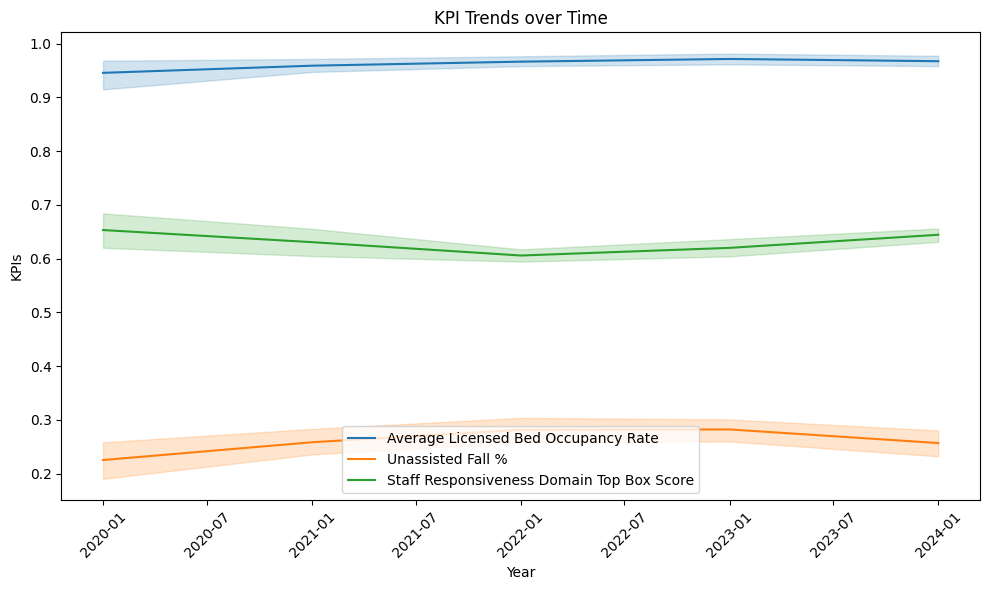

Pearson Correlation Matrix:
                                        AverageLicensedBedOccupancyRate  \
AverageLicensedBedOccupancyRate                               1.000000   
UnassistedFall%                                               0.700112   
StaffResponsivenessDomainTopBoxScore%                        -0.371821   

                                       UnassistedFall%  \
AverageLicensedBedOccupancyRate               0.700112   
UnassistedFall%                               1.000000   
StaffResponsivenessDomainTopBoxScore%        -0.791340   

                                       StaffResponsivenessDomainTopBoxScore%  
AverageLicensedBedOccupancyRate                                    -0.371821  
UnassistedFall%                                                    -0.791340  
StaffResponsivenessDomainTopBoxScore%                               1.000000  
Spearman Correlation Matrix:
                                        AverageLicensedBedOccupancyRate  \
AverageLicensedBedOcc

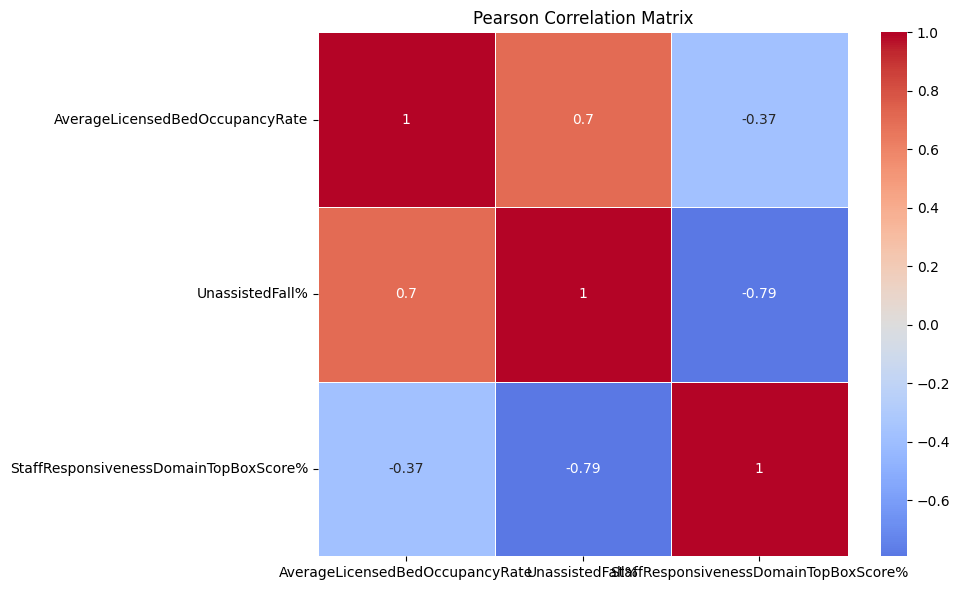

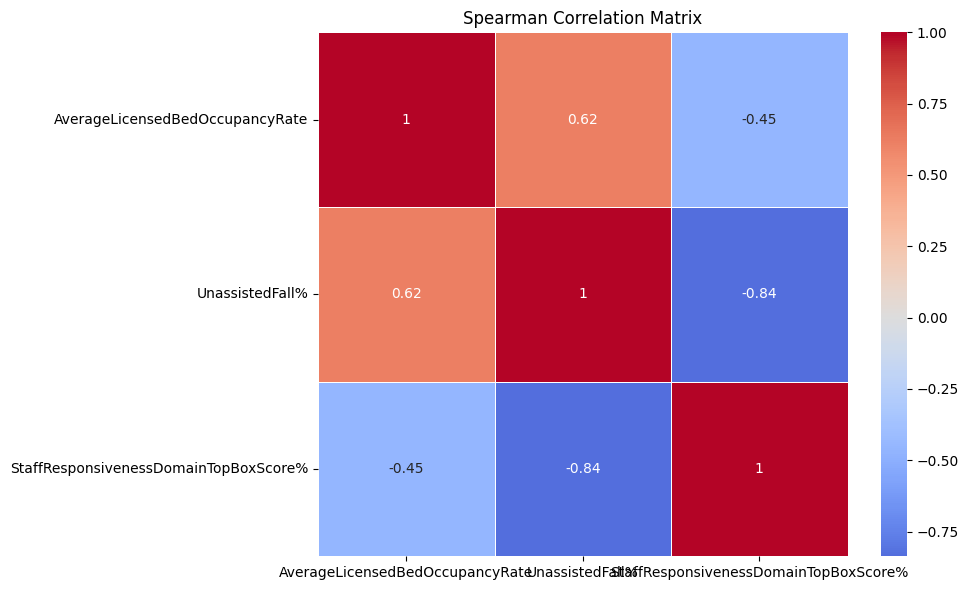

In [70]:
# Step 5: Correlation Analysis

# 5.1: Pearson correlation for linear relationships
pearson_corr_matrix = df[['AverageLicensedBedOccupancyRate','UnassistedFall%','StaffResponsivenessDomainTopBoxScore%']].corr(method='pearson')
print("Pearson Correlation Matrix:\n", pearson_corr_matrix)

# 5.2: Spearman correlation for monotonic relationships
spearman_corr_matrix = df[['AverageLicensedBedOccupancyRate','UnassistedFall%','StaffResponsivenessDomainTopBoxScore%']].corr(method='spearman')
print("Spearman Correlation Matrix:\n", spearman_corr_matrix)

# 5.3: Visualize the correlation matrix using heatmaps
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.tight_layout()
plt.show()

In [71]:
import pandas as pd

# Define the concise correlation interpretation table
correlation_strength = {
    'Correlation Value Range': ['1.0', '0.8 to 1.0', '0.5 to 0.8', '0.2 to 0.5', '0 to 0.2',
                                '-0.2 to 0', '-0.5 to -0.2', '-0.8 to -0.5', '-1.0 to -0.8', '-1.0'],
    'Strength': ['Perfect Positive', 'Strong Positive', 'Moderate Positive', 'Weak Positive', 'Very Weak/No Correlation',
                 'Very Weak/Negative Correlation', 'Weak Negative', 'Moderate Negative', 'Strong Negative', 'Perfect Negative']
}

# Create a DataFrame
correlation_strength_df = pd.DataFrame(correlation_strength)

# Display the table
print(correlation_strength_df)

  Correlation Value Range                        Strength
0                     1.0                Perfect Positive
1              0.8 to 1.0                 Strong Positive
2              0.5 to 0.8               Moderate Positive
3              0.2 to 0.5                   Weak Positive
4                0 to 0.2        Very Weak/No Correlation
5               -0.2 to 0  Very Weak/Negative Correlation
6            -0.5 to -0.2                   Weak Negative
7            -0.8 to -0.5               Moderate Negative
8            -1.0 to -0.8                 Strong Negative
9                    -1.0                Perfect Negative
